In [ ]:
# notebook for deep q learning
# not finished yet

raise NotImplementedError

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import tensorflow.keras as keras
tf.config.list_physical_devices('GPU')

[]

In [17]:
import gym
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

SIZE = 8  # map size

env = gym.make('FrozenLake8x8-v1', is_slippery=False)

def int2loc(x):
    """
    Convert state number into 2d matrix index
    e.g. 3 -> (0, 4),  4 -> (1, 0)
    """
    return (x // SIZE, x % SIZE)

assert np.all(int2loc(4) == np.array([0,4]))

valid_start = [s for s in range(63) 
               if env.desc[int2loc(s)] in 
               [env.desc[int2loc(0)], env.desc[int2loc(1)]]]
               
def random_start(env):
    env.reset()
    env.env.s = np.random.choice(valid_start)
    return env.env.s

In [19]:
class DQN():
    
    def __init__(self, nn, e=0.2, y=0.9, ):
        
        self.e = e
        self.y = y
        self.choice = np.array([0,1,2,3])
        
        self.policy = nn
        self.target = keras.models.clone_model(self.policy)
        self.test_mode = False
        
    def action(self, state):
        if not self.test_mode and np.random.rand() <= self.e:
            action = np.random.choice(self.choice)
        else:
            action = np.argmax(self.policy(state))
        return action
    
    def learn(self, state, action, reward, state_, done):
        
        targ = reward + self.y * (tf.reduce_max(self.target(state_)) if not done else tf.constant(0.0))
        with tf.GradientTape() as tape:
            pred = self.policy(state)[0][action]
            
#             loss = tf.Variable([0.0, 0.0, 0.0, 0.0])
#             loss[action].assign(targ - pred)
            
            
            loss = tf.losses.MeanSquaredError()([targ], [pred])
            
            print(loss)
            grads = tape.gradient(loss, self.policy.trainable_variables)
        self.policy.optimizer.apply_gradients(zip(grads, self.policy.trainable_variables))
        
    def update(self):
        # deepcopy policy network
        self.target = keras.models.clone_model(self.policy)
        self.target.build((1,2))
        self.target.compile(optimizer='adam', loss='mse')
        self.target.set_weights(self.policy.get_weights())

In [20]:
def episode(env, agent, test=False, random=False):
    
    agent.test_mode = test
    
    # initialize environment
    state = env.reset() if not random else random_start(env)
    state = np.array([int2loc(state)])
    
    for step in range(MAX_STEPS):
        
        # act
        action = agent.action(state)
        state_, reward, done, _ = env.step(action)
        state_ = np.array([int2loc(state_)])
        
        # observe
        agent.learn(state, action, reward, state_, done)

        if done:
            return step

        state = state_

In [21]:
nn = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='ReLU'),
    keras.layers.Dense(32, activation='ReLU'),
    keras.layers.Dense(64, activation ='ReLU'),
    keras.layers.Dense(4)
])

nn.build((1,2))
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')
agent = DQN(nn)

In [22]:
EPISODES = 100
MAX_STEPS = 100


steps = []

for i in range(EPISODES):
    
    episode(env, agent, test=False, random=True);
    
    if i%10 == 0:
        steps.append(episode(env, agent, test=True, random=False))
    if i%20 == 0:
        agent.update()

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0024912332, shape=(), dtype=float32)
tf.Tensor(0.0027487646, shape=(), dtype=float32)
tf.Tensor(0.0015000183, shape=(), dtype=float32)
tf.Tensor(6.6245884e-05, shape=(), dtype=float32)
tf.Tensor(6.8518773e-07, shape=(), dtype=float32)
tf.Tensor(0.00016393869, shape=(), dtype=float32)
tf.Tensor(0.00020362006, shape=(), dtype=float32)
tf.Tensor(0.00021371075, shape=(), dtype=float32)
tf.Tensor(1.2144051e-06, shape=(), dtype=float32)
tf.Tensor(0.00017762091, shape=(), dtype=float32)
tf.Tensor(0.000140547, shape=(), dtype=float32)
tf.Tensor(9.691

KeyboardInterrupt: 

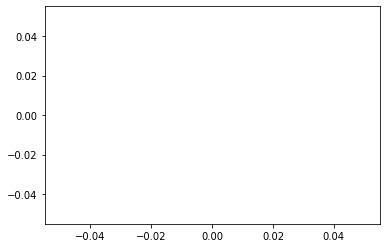

In [23]:
plt.scatter(range(len(steps)), steps);